#### Instalasi
Opsional

In [4]:
!pip install emoji
!pip3 install snscrape
!pip3 install numpy
!pip3 install pandas

     |████████████████████████████████| 175 kB 18.2 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=d65f87915c1e954f62a2d80ffac5fce5b3465b4d881da8bde79b960d12d54842
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [6]:
!pip install nltk
!pip install PySastrawi

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#### Import Library

In [1]:
# import
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense
import re
import emoji
import seaborn as sn
import random
import requests
import numpy as np
import snscrape.modules.twitter as sntwitter
import itertools

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS

#### Import Data

In [2]:
#Data Jumlah Vaksinasi

#Proses labeling data Twitter berdasarkan sentimen yang dihasilkan dari setiap text tweet dilakukan secara manual. 
vaksin = pd.read_csv('data_tweet.csv', sep=';', encoding= 'unicode_escape')

In [3]:
#Data Jumlah Vaksinasi
#Read data
dat = pd.read_csv('Indonesia.csv')
dat


,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,Indonesia,2021-01-12,Sinovac,https://www.dw.com/en/indonesias-covid-vaccina...,0,0,0,NaN
1,Indonesia,2021-01-22,Sinovac,https://sehatnegeriku.kemkes.go.id/baca/rilis-...,132000,132000,0,NaN
2,Indonesia,2021-01-24,Sinovac,https://www.kemkes.go.id/,149242,149242,0,NaN
3,Indonesia,2021-01-25,Sinovac,https://www.kemkes.go.id/,161959,161959,0,NaN
4,Indonesia,2021-01-26,Sinovac,https://www.kemkes.go.id/,245685,245685,0,NaN
...,...,...,...,...,...,...,...,...
254,Indonesia,2021-11-07,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",https://vaksin.kemkes.go.id/#/vaccines,204100126,125105963,78994163,NaN
255,Indonesia,2021-11-08,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",https://vaksin.kemkes.go.id/#/vaccines,204606962,125394487,79212475,NaN
256,Indonesia,2021-11-09,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",https://vaksin.kemkes.go.id/#/vaccines,206529810,126459285,80070525,NaN
257,Indonesia,2021-11-10,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",https://vaksin.kemkes.go.id/#/vaccines,208289405,127335266,80954139,NaN


#### Data Preparation

##### a.Data Twitter

In [4]:
vaksin = vaksin.rename(columns={'ï»¿id': 'id'})
vaksin

,id,created_at,text,label
0,0,2021-03-01T01:41:35.000Z,@RadioElshinta buat apa sih berita tayang beru...,-1.0
1,1,2021-03-01T02:40:20.000Z,@PMI_DKI_Jakarta Min mau tanyaa.. kalau sudah ...,0.0
2,2,2021-03-01T03:21:47.000Z,Kita memasuki Maret 2021. Ini update Covid-19 ...,0.0
3,3,2021-03-01T03:24:07.000Z,RT @jayakabajay: Pandemi Corona di Indonesia u...,1.0
4,4,2021-03-01T04:04:36.000Z,@rkhairu Ada temen gw juga nolak vaksin,-1.0
...,...,...,...,...
6722,6834,2021-08-30T15:21:45.000Z,@eko_analist Maaf kak kok malah nyuru aku buat...,-1.0
6723,6835,2021-08-30T15:45:19.000Z,Review Vaksin Dosis Kedua : AZ\n1. Hanya di ar...,1.0
6724,6836,2021-08-30T15:51:56.000Z,Abis di ceramahin sama sodara2. Masalah udh va...,1.0
6725,6837,2021-08-30T16:06:16.000Z,Ga ngerti kenapa pas tipsy akibat vaksin malah...,0.0


In [5]:
## Cleansing Data

# 1. Membersihkan data tanggal menjadi format yang benar
vaksin[['created','timestamp']] = vaksin.created_at.str.split("T",expand=True,)
vaksin

#Data tanggal tidak beraturan, dilakukan pemisahan atas tanggal dan waktu vaksinasi
#Yang digunakan dalam analisis hanya tanggal saja

,id,created_at,text,label,created,timestamp
0,0,2021-03-01T01:41:35.000Z,@RadioElshinta buat apa sih berita tayang beru...,-1.0,2021-03-01,01:41:35.000Z
1,1,2021-03-01T02:40:20.000Z,@PMI_DKI_Jakarta Min mau tanyaa.. kalau sudah ...,0.0,2021-03-01,02:40:20.000Z
2,2,2021-03-01T03:21:47.000Z,Kita memasuki Maret 2021. Ini update Covid-19 ...,0.0,2021-03-01,03:21:47.000Z
3,3,2021-03-01T03:24:07.000Z,RT @jayakabajay: Pandemi Corona di Indonesia u...,1.0,2021-03-01,03:24:07.000Z
4,4,2021-03-01T04:04:36.000Z,@rkhairu Ada temen gw juga nolak vaksin,-1.0,2021-03-01,04:04:36.000Z
...,...,...,...,...,...,...
6722,6834,2021-08-30T15:21:45.000Z,@eko_analist Maaf kak kok malah nyuru aku buat...,-1.0,2021-08-30,15:21:45.000Z
6723,6835,2021-08-30T15:45:19.000Z,Review Vaksin Dosis Kedua : AZ\n1. Hanya di ar...,1.0,2021-08-30,15:45:19.000Z
6724,6836,2021-08-30T15:51:56.000Z,Abis di ceramahin sama sodara2. Masalah udh va...,1.0,2021-08-30,15:51:56.000Z
6725,6837,2021-08-30T16:06:16.000Z,Ga ngerti kenapa pas tipsy akibat vaksin malah...,0.0,2021-08-30,16:06:16.000Z


In [6]:
# 2. Menghapus kolom yang tidak relevan untuk analisis

vaksin_new = vaksin.drop(columns=['created_at', 'timestamp', 'id'])

In [7]:
vaksin_new.rename(columns={'created': 'created_at'}, inplace=True)

In [8]:
vaksin_new = vaksin_new.reindex(columns=['created_at', 'text', 'label'])
vaksin_new['created_at']= pd.to_datetime(vaksin_new['created_at'])

# Hasil pembersihan data tanggal
vaksin_new

,created_at,text,label
0,2021-03-01,@RadioElshinta buat apa sih berita tayang beru...,-1.0
1,2021-03-01,@PMI_DKI_Jakarta Min mau tanyaa.. kalau sudah ...,0.0
2,2021-03-01,Kita memasuki Maret 2021. Ini update Covid-19 ...,0.0
3,2021-03-01,RT @jayakabajay: Pandemi Corona di Indonesia u...,1.0
4,2021-03-01,@rkhairu Ada temen gw juga nolak vaksin,-1.0
...,...,...,...
6722,2021-08-30,@eko_analist Maaf kak kok malah nyuru aku buat...,-1.0
6723,2021-08-30,Review Vaksin Dosis Kedua : AZ\n1. Hanya di ar...,1.0
6724,2021-08-30,Abis di ceramahin sama sodara2. Masalah udh va...,1.0
6725,2021-08-30,Ga ngerti kenapa pas tipsy akibat vaksin malah...,0.0


In [9]:
#3. Check NA Value + membersihkan NA

#Mencari NA dalam dataframe

vaksin_new.isnull().sum()

#Terdapat satu NA pada kolom label

created_at    0
text          0
label         1
dtype: int64

In [10]:
#Melihat data yang memiliki nilai NA

vaksin_new[vaksin_new['label'].isnull()]

,created_at,text,label
2172,2021-06-23,"Alhamdulillah dapet berita happy, \n\n1. Gw ud...",NaN


In [11]:
#Replace NA with value

vaksin_new.loc[vaksin_new.index[2172], 'label'] = 1

#Opsi lain: row dengan NA tersebut dihapus
#Namun karena jelas bahwa komentar tersebut adalah komentar positif, maka diputuskan untuk menambahkan label manual saja dibandingkan menghapus barisnya

In [12]:
#Change label type to integer
vaksin_new['label'] = vaksin_new['label'].astype(int)

In [13]:
# 4. Pembersihan enter menjadi spasi dan karakter yang tidak diperlukan

# Mengubah enter menjadi spasi
vaksin_new['text'] = vaksin_new['text'].replace({r'\s+$': '', r'^\s+': ''}, regex=True).replace(r'\n',  ' ', regex=True)

In [14]:
# Menghapus RT, url, @, hashtag, emoji, selain angka sama huruf

def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    tweet = tweet.replace("RT", "")
    tweet = tweet.replace(":", "")
    tweet = re.sub('[^A-Za-z0-9 ]+', '', tweet)
    return tweet
vaksin_new['text'] = vaksin_new['text'].map(lambda x: cleaner(x))

In [15]:
# Menghapus tweet duplikat
vaksin_new.drop_duplicates(subset ="text", keep = False, inplace = True)

In [16]:
vaksin_new

,created_at,text,label
0,2021-03-01,buat apa sih berita tayang berulang2 ttg nakes...,-1
1,2021-03-01,DKI Jakarta Min mau tanyaa kalau sudah vaksin...,0
2,2021-03-01,Kita memasuki Maret 2021 Ini update Covid19 di...,0
3,2021-03-01,Pandemi Corona di Indonesia udah mau setaun ...,1
4,2021-03-01,Ada temen gw juga nolak vaksin,-1
...,...,...,...
6722,2021-08-30,analist Maaf kak kok malah nyuru aku buat vak...,-1
6723,2021-08-30,Review Vaksin Dosis Kedua AZ 1 Hanya di area ...,1
6724,2021-08-30,Abis di ceramahin sama sodara2 Masalah udh vak...,1
6725,2021-08-30,Ga ngerti kenapa pas tipsy akibat vaksin malah...,0


In [17]:
vaksin_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6676 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  6676 non-null   datetime64[ns]
 1   text        6676 non-null   object        
 2   label       6676 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 208.6+ KB


In [18]:
# Ubah label jadi karakter
vaksin_new.loc[vaksin_new.label == -1, 'label'] = 'negative'
vaksin_new.loc[vaksin_new.label == 0, 'label'] = 'neutral'
vaksin_new.loc[vaksin_new.label == 1, 'label'] = 'positive'

# One Hot Encoding
label = pd.get_dummies(vaksin_new.label)

In [19]:
label

,negative,neutral,positive
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,1,0,0
...,...,...,...
6722,1,0,0
6723,0,0,1
6724,0,0,1
6725,0,1,0


In [20]:
# menggabungkan data vaksin_new dan label
vaksin_final = pd.concat([vaksin_new, label], axis=1)

In [21]:
#drop label lama
vaksin_final = vaksin_final.drop(columns=['label'])

In [22]:
vaksin_final

,created_at,text,negative,neutral,positive
0,2021-03-01,buat apa sih berita tayang berulang2 ttg nakes...,1,0,0
1,2021-03-01,DKI Jakarta Min mau tanyaa kalau sudah vaksin...,0,1,0
2,2021-03-01,Kita memasuki Maret 2021 Ini update Covid19 di...,0,1,0
3,2021-03-01,Pandemi Corona di Indonesia udah mau setaun ...,0,0,1
4,2021-03-01,Ada temen gw juga nolak vaksin,1,0,0
...,...,...,...,...,...
6722,2021-08-30,analist Maaf kak kok malah nyuru aku buat vak...,1,0,0
6723,2021-08-30,Review Vaksin Dosis Kedua AZ 1 Hanya di area ...,0,0,1
6724,2021-08-30,Abis di ceramahin sama sodara2 Masalah udh vak...,0,0,1
6725,2021-08-30,Ga ngerti kenapa pas tipsy akibat vaksin malah...,0,1,0


In [23]:
# Mengubah ke format week dan menjumlahkan sentimen berdasarkan hitungan minggu

vaksin_final['Week'] = vaksin_final['created_at'].dt.week


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
negatif = vaksin_final.groupby(['Week'], as_index=False)[['negative']].sum()

netral = vaksin_final.groupby(['Week'], as_index=False)[['neutral']].sum()
netral = netral.drop(columns=['Week'])

positif = vaksin_final.groupby(['Week'], as_index=False)[['positive']].sum()
positif = positif.drop(columns=['Week'])

In [25]:
vaksin_final = pd.concat([negatif, netral, positif], axis=1)

In [26]:
vaksin_final[2:3] = vaksin_final[2:3].astype(int)
vaksin_final

#Preprocessing data tweet selesai

,Week,negative,neutral,positive
0,9,8,64.0,34
1,10,7,74.0,36
2,11,14,95.0,54
3,12,12,72.0,50
4,13,10,58.0,32
5,14,12,62.0,21
6,15,9,57.0,20
7,16,9,48.0,17
8,17,7,49.0,22
9,18,6,41.0,23


##### b. Data Jumlah Vaksinasi

In [27]:
dat

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,Indonesia,2021-01-12,Sinovac,https://www.dw.com/en/indonesias-covid-vaccina...,0,0,0,NaN
1,Indonesia,2021-01-22,Sinovac,https://sehatnegeriku.kemkes.go.id/baca/rilis-...,132000,132000,0,NaN
2,Indonesia,2021-01-24,Sinovac,https://www.kemkes.go.id/,149242,149242,0,NaN
3,Indonesia,2021-01-25,Sinovac,https://www.kemkes.go.id/,161959,161959,0,NaN
4,Indonesia,2021-01-26,Sinovac,https://www.kemkes.go.id/,245685,245685,0,NaN
...,...,...,...,...,...,...,...,...
254,Indonesia,2021-11-07,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",https://vaksin.kemkes.go.id/#/vaccines,204100126,125105963,78994163,NaN
255,Indonesia,2021-11-08,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",https://vaksin.kemkes.go.id/#/vaccines,204606962,125394487,79212475,NaN
256,Indonesia,2021-11-09,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",https://vaksin.kemkes.go.id/#/vaccines,206529810,126459285,80070525,NaN
257,Indonesia,2021-11-10,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",https://vaksin.kemkes.go.id/#/vaccines,208289405,127335266,80954139,NaN


In [28]:
# Cleansing Data

#Ubah tipe data date
dat['date']= pd.to_datetime(dat['date'])
dat['total_vaccinations'] = dat['total_vaccinations'].astype(int)

dat.info()

#Filtering data
start_date = "2021-03-01"
end_date = "2021-08-30"

after_start_date = dat["date"] >= start_date
before_end_date = dat["date"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates = dat.loc[between_two_dates]

filtered_dates





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   location                 259 non-null    object        
 1   date                     259 non-null    datetime64[ns]
 2   vaccine                  259 non-null    object        
 3   source_url               259 non-null    object        
 4   total_vaccinations       259 non-null    int64         
 5   people_vaccinated        259 non-null    int64         
 6   people_fully_vaccinated  259 non-null    int64         
 7   total_boosters           0 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 16.3+ KB


,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
34,Indonesia,2021-03-02,Sinovac,https://www.kemkes.go.id/article/view/21030300...,3023348,1968057,1055291,NaN
35,Indonesia,2021-03-03,Sinovac,https://www.kemkes.go.id/article/view/21030300...,3386351,2286123,1100228,NaN
36,Indonesia,2021-03-05,Sinovac,https://www.kemkes.go.id/article/view/21030300...,3528152,2413615,1114537,NaN
37,Indonesia,2021-03-07,Sinovac,https://www.kemkes.go.id/article/view/21030300...,4022544,2888757,1133787,NaN
38,Indonesia,2021-03-10,Sinovac,https://www.kemkes.go.id/article/view/21030300...,4837576,3574698,1262878,NaN
...,...,...,...,...,...,...,...,...
181,Indonesia,2021-08-26,"Moderna, Oxford/AstraZeneca, Sinopharm/Beijing...",https://vaksin.kemkes.go.id/#/vaccines,92784183,59426934,33357249,NaN
182,Indonesia,2021-08-27,"Moderna, Oxford/AstraZeneca, Sinopharm/Beijing...",https://vaksin.kemkes.go.id/#/vaccines,94556758,60435555,34121203,NaN
183,Indonesia,2021-08-28,"Moderna, Oxford/AstraZeneca, Sinopharm/Beijing...",https://vaksin.kemkes.go.id/#/vaccines,95925079,61222258,34702821,NaN
184,Indonesia,2021-08-29,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",https://vaksin.kemkes.go.id/#/vaccines,96512676,61654676,34858000,NaN


In [29]:
#Filter column
dat_new = filtered_dates.drop(columns=['location', 'vaccine', 'source_url', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters'])

In [30]:
dat_new

,date,total_vaccinations
34,2021-03-02,3023348
35,2021-03-03,3386351
36,2021-03-05,3528152
37,2021-03-07,4022544
38,2021-03-10,4837576
...,...,...
181,2021-08-26,92784183
182,2021-08-27,94556758
183,2021-08-28,95925079
184,2021-08-29,96512676


In [31]:
# Mengubah ke format mingguan (vaksin ditotalkan perminggu)
dat_new['Week'] = dat_new['date'].dt.week
total_vaksin = dat_new.groupby(['Week'], as_index=False)[['total_vaccinations']].sum()
total_vaksin


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


,Week,total_vaccinations
0,9,13960395
1,10,25858564
2,11,48355405
3,12,58908135
4,13,48842514
5,14,42606044
6,15,80613345
7,16,106758641
8,17,117766052
9,18,85729725


In [32]:
# Menggabungkan data twitter & vaksin
total_vaksin = total_vaksin.drop(columns = ['Week'], axis = 1)
final = pd.concat([vaksin_final, total_vaksin], axis=1)
final

,Week,negative,neutral,positive,total_vaccinations
0,9,8,64.0,34,13960395
1,10,7,74.0,36,25858564
2,11,14,95.0,54,48355405
3,12,12,72.0,50,58908135
4,13,10,58.0,32,48842514
5,14,12,62.0,21,42606044
6,15,9,57.0,20,80613345
7,16,9,48.0,17,106758641
8,17,7,49.0,22,117766052
9,18,6,41.0,23,85729725


#### Text Processing

In [33]:
# Case Folding Data Tweet

vaksin_new["text"] = vaksin_new["text"].str.lower()

In [34]:
tweet = vaksin_new['text'].str.cat(sep='')
tweet

'buat apa sih berita tayang berulang2 ttg nakes polwan yg teriak2 waktu mau di vaksin norak banget malu2in dki jakarta min mau tanyaa kalau sudah vaksin covid 19 apakah boleh tetap donor darah sesuai jadwalkita memasuki maret 2021 ini update covid19 di negara kita jalan perjuangan indonesia keluar dari wabah kasus terkonfirmasi  133 juta pasien sembuh  114 juta dalam perawatan  155 ribu vaksinasi 1  169 juta vaksinasi 2  998 ribu tetap jaga 3m nutrisi ventilasi  pandemi corona di indonesia udah mau setaun aja nih mau bilang ngga berasa tapi kenyataannya berasa banget asli mudahmudahan aja bisa segera hilang dengan adanya vaksinasi dan semua bisa segera normal kembaliada temen gw juga nolak vaksinkeknya ikut yang perusahaan mas tahu deh pakai vaksin yang manahabis vaksin akhirnyaaa  katanya efeknya ngantuk skrng ngantuk bgt kerja tp setiap hari jam segini juga ngantuk tapi kan tetap harus di vaksin ya kak poz tinggal cari yg less side effect dr 4 pilihan tsb yamin klo sdh vaksin apakah 

In [35]:
# Tokenization 

tweet_tokens = word_tokenize(tweet)
tweet_tokens

['buat',
 'apa',
 'sih',
 'berita',
 'tayang',
 'berulang2',
 'ttg',
 'nakes',
 'polwan',
 'yg',
 'teriak2',
 'waktu',
 'mau',
 'di',
 'vaksin',
 'norak',
 'banget',
 'malu2in',
 'dki',
 'jakarta',
 'min',
 'mau',
 'tanyaa',
 'kalau',
 'sudah',
 'vaksin',
 'covid',
 '19',
 'apakah',
 'boleh',
 'tetap',
 'donor',
 'darah',
 'sesuai',
 'jadwalkita',
 'memasuki',
 'maret',
 '2021',
 'ini',
 'update',
 'covid19',
 'di',
 'negara',
 'kita',
 'jalan',
 'perjuangan',
 'indonesia',
 'keluar',
 'dari',
 'wabah',
 'kasus',
 'terkonfirmasi',
 '133',
 'juta',
 'pasien',
 'sembuh',
 '114',
 'juta',
 'dalam',
 'perawatan',
 '155',
 'ribu',
 'vaksinasi',
 '1',
 '169',
 'juta',
 'vaksinasi',
 '2',
 '998',
 'ribu',
 'tetap',
 'jaga',
 '3m',
 'nutrisi',
 'ventilasi',
 'pandemi',
 'corona',
 'di',
 'indonesia',
 'udah',
 'mau',
 'setaun',
 'aja',
 'nih',
 'mau',
 'bilang',
 'ngga',
 'berasa',
 'tapi',
 'kenyataannya',
 'berasa',
 'banget',
 'asli',
 'mudahmudahan',
 'aja',
 'bisa',
 'segera',
 'hilang',


In [36]:
# Menghilangkan Stopwords

content = open("stopwords.txt")
file_contents = content.read()
stopword = file_contents.splitlines()

stopword

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

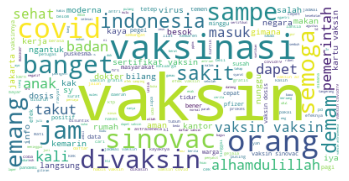

In [37]:
# World Cloud

wordcloud = WordCloud(background_color ='white', stopwords = stopword).generate(str(tweet))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### Analisis Korelasi Data

In [38]:
# Eksplorasi data
final[['negative','neutral','positive','total_vaccinations']].corr()

,negative,neutral,positive,total_vaccinations
negative,1.000000,0.932007,0.925740,0.583247
neutral,0.932007,1.000000,0.941769,0.751085
positive,0.925740,0.941769,1.000000,0.617264
total_vaccinations,0.583247,0.751085,0.617264,1.000000


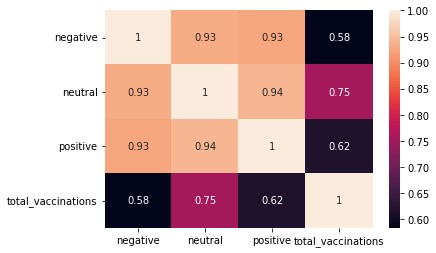

In [39]:
# Correlation Matrix
final_corr = final[['negative', 'neutral', 'positive', 'total_vaccinations']]
corrMatrix = final_corr.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

#### Data Modeling: Prediction with Linear Regression

Model ini dibentuk untuk memprediksi jumlah vaksinasi COVID-19 berdasarkan sentimen opini masyarakat pada sosial media Twitter.

In [40]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [41]:
x = final[['negative',	'neutral',	'positive']]
y = final['total_vaccinations']

In [42]:
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.691457858109572


In [43]:
new_sentimen_test = {'negative': [10, 10], 'neutral': [90, 30], 'positive': [120, 10]}
new_sentimen_test = pd.DataFrame(new_sentimen_test)

lr_pred = model.predict(new_sentimen_test)
print('Hasil prediksi:', lr_pred)

Hasil prediksi: [48933713.4018892  37911077.39325078]
